# 高斯混合模型的参数求解

## 1、实验简介
基于scipy与numpy用EM算法实现高斯混合模型的参数求解。

## 2、GMM模型实现

In [1]:
# -*- coding:utf-8 -*-
# @FileName : gmm.py
# @Time : 2024/3/26 19:09
# @Author : fiv


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as multi_norm_s
from numpy.random import multivariate_normal as multi_norm_n


class GMM:
    def __init__(self, n_components, max_iter=100, tol=1e-4):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape
        self.weights = np.ones(self.n_components) / self.n_components
        # weights -->> 每个高斯分布的权重
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        # means -->> 每个高斯分布的均值
        self.covariances = np.array([np.eye(n_features) for _ in range(self.n_components)])
        # covariances -->> 每个高斯分布的协方差矩阵

        # EM algorithm
        for _ in range(self.max_iter):
            # E-step -->> 计算每个样本属于每个高斯分布的概率
            probs = np.array(
                [multi_norm_s.pdf(X, mean=mean, cov=cov) for mean, cov in zip(self.means, self.covariances)]).T
            # multi_norm_s.pdf -->> 多元正态分布的概率密度函数
            probs = probs * self.weights
            probs /= np.sum(probs, axis=1, keepdims=True)

            # M-step -->> 更新参数
            N_k = np.sum(probs, axis=0)
            self.weights = N_k / n_samples
            self.means = np.dot(probs.T, X) / N_k[:, None]
            self.covariances = np.array([np.dot((X - mean).T, (X - mean) * prob[:, None]) / N for mean, prob, N in
                                         zip(self.means, probs.T, N_k)])

    def predict(self, X):
        probs = np.array([multi_norm_s.pdf(X, mean=mean, cov=cov) for mean, cov in zip(self.means, self.covariances)]).T
        return np.argmax(probs, axis=1)

    def sample(self, n_samples):
        samples = []
        for _ in range(n_samples):
            z = np.random.choice(self.n_components, p=self.weights)
            sample = multi_norm_n(self.means[z], self.covariances[z])
            samples.append(sample)
        return np.array(samples)

    def plot(self, X):
        plt.scatter(X[:, 0], X[:, 1], c=self.predict(X))
        plt.scatter(self.means[:, 0], self.means[:, 1], c='red', marker='x')
        plt.show()

## 3、实验测试

### 3.1、产生数据

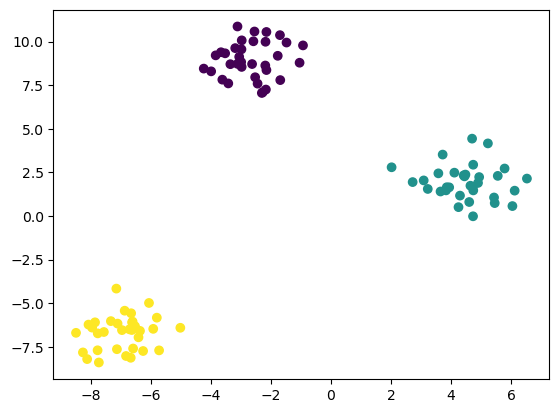

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### 3.2、训练模型
max_iter = 1过小，模型未收敛

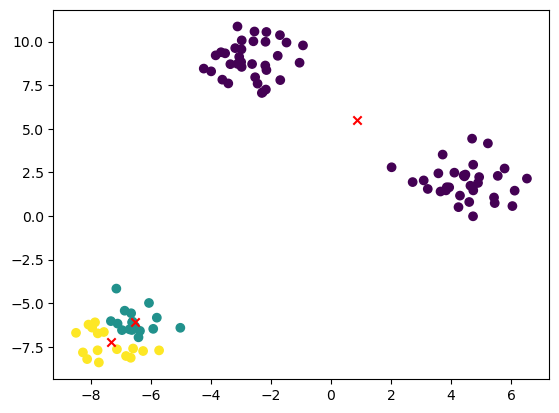

In [4]:
gmm = GMM(n_components=3, max_iter=1)
gmm.fit(X)
gmm.plot(X)

### 3.3、加大迭代次数

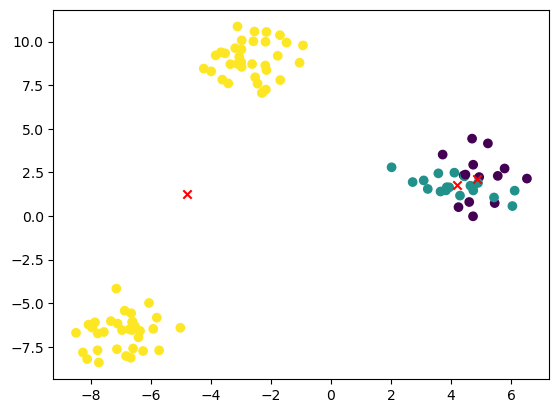

In [5]:
gmm = GMM(n_components=3, max_iter=10)
gmm.fit(X)
gmm.plot(X)

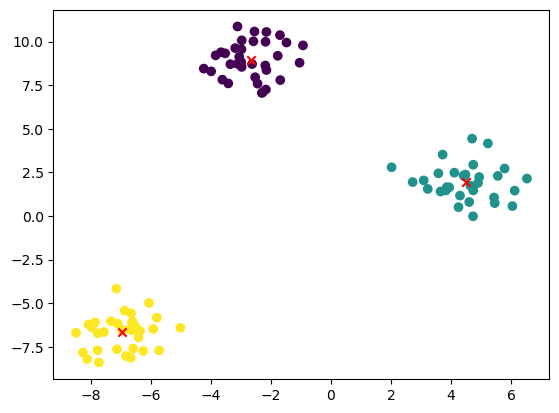

In [6]:
gmm = GMM(n_components=3, max_iter=100)
gmm.fit(X)
gmm.plot(X)

In [7]:
gmm.predict(X)

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0], dtype=int64)

In [8]:
gmm.sample(10)

array([[-3.28051174,  6.4099346 ],
       [ 4.41040509,  2.35211546],
       [ 3.82040213,  2.20182275],
       [ 3.64637136,  0.91756679],
       [-2.09630945,  9.72654822],
       [ 3.69910056,  2.386165  ],
       [-5.03363144, -6.86867106],
       [-6.46378956, -7.69795672],
       [-5.82325658, -5.79732111],
       [-6.96152774, -6.43122177]])